In [2]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import re

Convert file log to dataframe

In [3]:
file_log= r'D:\code-python\project_practice\server_log\0.log.20241201-211909\0.log.20241201-211909'

In [4]:
log_pattern= r'^\S+ (?P<std>\S+) \S+ (?P<remote_address>\d+\.\d+\.\d+\.\d+) - (?P<remote_user>[^ ]*) \[(?P<datetime>[^\]]+)\] "(?P<method>\w+) (?P<path>[^\s]+) (?P<header>[^\"]+)" (?P<status>\d+) (?P<bytes_sent>\d+) "(?P<referer>[^\"]*)" "(?P<user_agent>[^\"]*)"'

In [5]:
with open(file_log, 'r') as file:
    log_lines = file.readlines()

In [6]:
parsed_logs = [re.match(log_pattern, line).groupdict() for line in log_lines if re.match(log_pattern, line)]

In [7]:
df = pd.DataFrame(parsed_logs)

In [8]:
df.head()

,std,remote_address,remote_user,datetime,method,path,header,status,bytes_sent,referer,user_agent
0,stdout,127.0.0.1,-,30/Nov/2024:06:51:41 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1
1,stderr,10.244.3.1,-,30/Nov/2024:06:51:42 +0000,GET,/status,HTTP/1.1,200,1165,-,kube-probe/1.27
2,stderr,10.244.3.1,-,30/Nov/2024:06:51:42 +0000,GET,/status/ready,HTTP/1.1,200,19,-,kube-probe/1.27
3,stdout,127.0.0.1,-,30/Nov/2024:06:51:44 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1
4,stdout,127.0.0.1,-,30/Nov/2024:06:51:47 +0000,GET,/status,HTTP/1.1,200,1164,-,kong-ingress-controller/3.3.1


In [9]:
#df.to_csv('D:/code-python/project_practice/server_log/dataframe/server_log_convert_dataframe.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66411 entries, 0 to 66410
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   std             66411 non-null  object
 1   remote_address  66411 non-null  object
 2   remote_user     66411 non-null  object
 3   datetime        66411 non-null  object
 4   method          66411 non-null  object
 5   path            66411 non-null  object
 6   header          66411 non-null  object
 7   status          66411 non-null  object
 8   bytes_sent      66411 non-null  object
 9   referer         66411 non-null  object
 10  user_agent      66411 non-null  object
dtypes: object(11)
memory usage: 5.6+ MB


Data Preprocessing

In [11]:
df['std'] = df['std'].replace({'stdout': 0, 'stderr': 1})

In [12]:
from datetime import datetime
df['datetime'] = df['datetime'].apply(lambda x: datetime.strptime(x, "%d/%b/%Y:%H:%M:%S %z"))

In [13]:
df = df.drop(['remote_user'], axis = 1)

In [14]:
df['method'] = df['method'].replace({'GET': 0, 'POST': 1})

In [15]:
df = df.drop(['header'], axis = 1)

In [16]:
df ['bytes_sent'] = pd.to_numeric(df['bytes_sent'])

In [17]:
df['status'] = pd.to_numeric(df['status'])

In [18]:
df.isnull().sum()

std               0
remote_address    0
datetime          0
method            0
path              0
status            0
bytes_sent        0
referer           0
user_agent        0
dtype: int64

In [19]:
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66411 entries, 0 to 66410
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   std             66411 non-null  int64              
 1   remote_address  66411 non-null  object             
 2   datetime        66411 non-null  datetime64[ns, UTC]
 3   method          66411 non-null  int64              
 4   path            66411 non-null  object             
 5   status          66411 non-null  int64              
 6   bytes_sent      66411 non-null  int64              
 7   referer         66411 non-null  object             
 8   user_agent      66411 non-null  object             
 9   day             66411 non-null  int32              
 10  hour            66411 non-null  int32              
 11  month           66411 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(3), int64(4), object(4)
memory usage: 5.3+ MB


Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

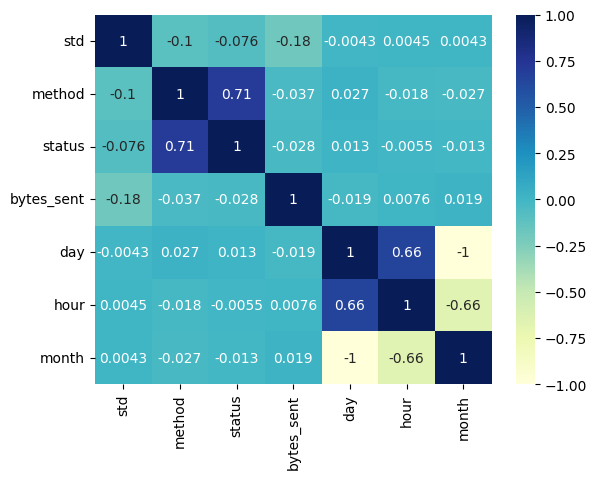

In [22]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

In [23]:
df.head(3)

,std,remote_address,datetime,method,path,status,bytes_sent,referer,user_agent,day,hour,month
0,0,127.0.0.1,2024-11-30 06:51:41+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11
1,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status,200,1165,-,kube-probe/1.27,30,6,11
2,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status/ready,200,19,-,kube-probe/1.27,30,6,11


In [24]:
#df.to_csv('D:/code-python/project_practice/server_log/dataframe/server_log_test.csv')

In [25]:
df_filter = df [(df['status']>=400) & (df['status']<500)]


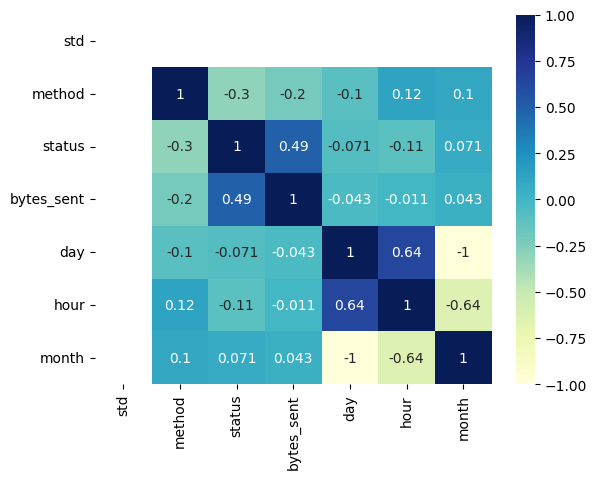

In [26]:
dataplot1 = sns.heatmap(df_filter.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

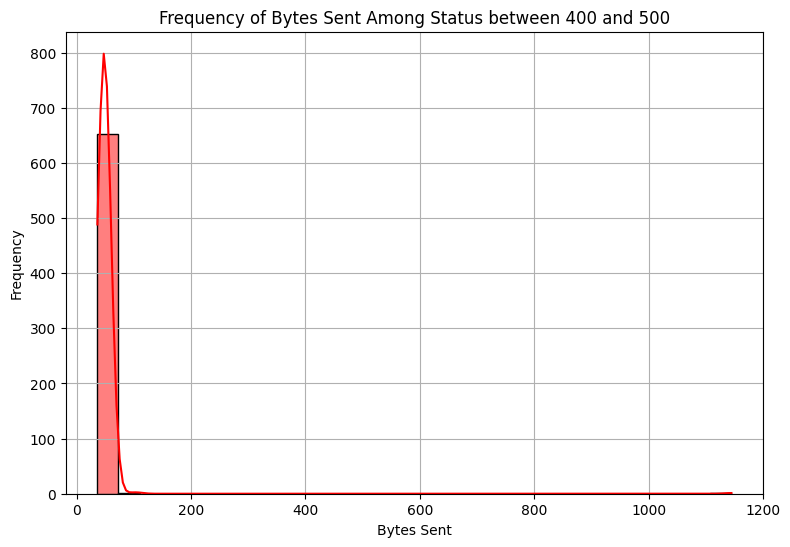

In [27]:
plt.figure(figsize=(9,6))
ax = sns.histplot(df_filter['bytes_sent'], bins =30, kde = True, color = 'red')
plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.title('Frequency of Bytes Sent Among Status between 400 and 500')
plt.grid()
plt.show()

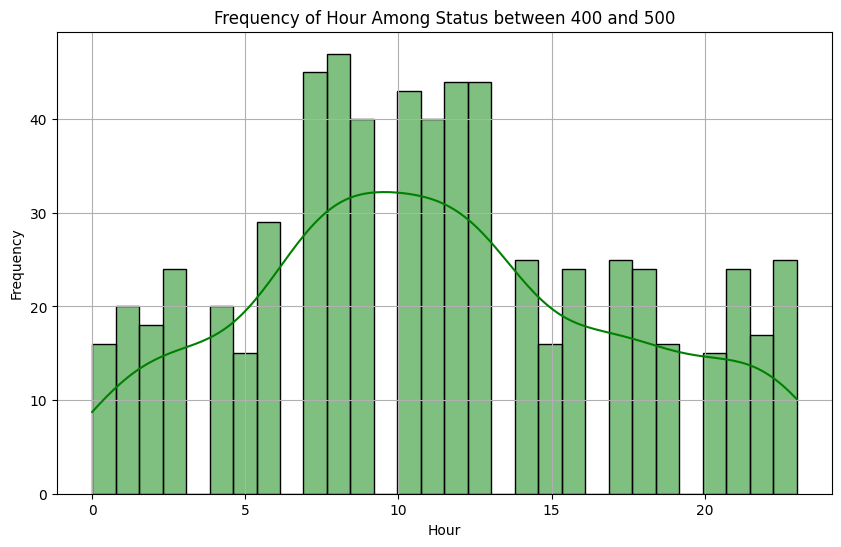

In [28]:
#Frequency of Hour Among Status between 400 and 500
plt.figure(figsize=(10,6))
sns.histplot(df_filter['hour'], bins =30, kde = True, 
             color = 'green')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Hour Among Status ' 
          'between 400 and 500')
plt.grid()
plt.show()

In [29]:
df_filter['bytes_sent'].value_counts()

bytes_sent
48      608
36       24
57       21
103       2
1145      1
Name: count, dtype: int64

In [30]:
df_filter['hour'].value_counts()

hour
8     47
7     45
12    44
13    44
10    43
9     40
11    40
6     29
14    25
23    25
17    25
21    24
3     24
18    24
16    24
1     20
4     20
2     18
22    17
19    16
0     16
15    16
20    15
5     15
Name: count, dtype: int64

In [31]:
df['user_agent'].value_counts()

user_agent
kong-ingress-controller/3.3.1                                                                                                                       37750
kube-probe/1.27                                                                                                                                     22650
otelcol-contrib/0.89.0                                                                                                                               3744
okhttp/4.12.0                                                                                                                                         943
python-requests/2.32.2                                                                                                                                608
VTHome_Dev/6 CFNetwork/1568.200.51 Darwin/24.1.0                                                                                                      499
VTHome_Dev/2 CFNetwork/1485 Darwin/23.1.0                        

In [32]:
df_filter['user_agent'].value_counts()

user_agent
python-requests/2.32.2                                                                                                                              608
HiRangDong/36 CFNetwork/1568.200.51 Darwin/24.1.0                                                                                                    20
VTHome_Dev/6 CFNetwork/1568.200.51 Darwin/24.1.0                                                                                                      6
okhttp/4.12.0                                                                                                                                         4
VTHome_Dev/13 CFNetwork/1568.200.51 Darwin/24.1.0                                                                                                     4
VTHome_Dev/2 CFNetwork/1485 Darwin/23.1.0                                                                                                             4
VTHome_Dev/6 CFNetwork/1498.700.2 Darwin/23.6.0                              

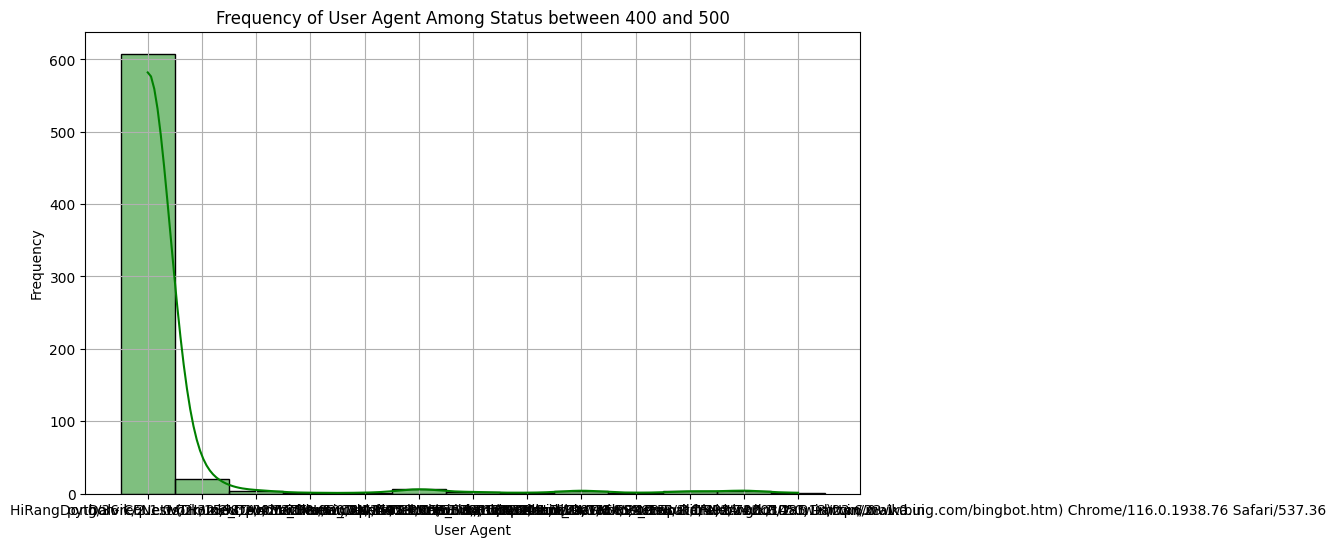

In [33]:
#Frequency of Hour Among Status between 400 and 500
plt.figure(figsize=(10,6))
sns.histplot(df_filter['user_agent'], bins =30, kde = True, 
             color = 'green')
plt.xlabel('User Agent')
plt.ylabel('Frequency')
plt.title('Frequency of User Agent Among Status ' 
          'between 400 and 500')
plt.grid()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10988\1595260255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='user_agent', data=df_filter, order=df_filter['user_agent'].value_counts().index, palette='viridis')


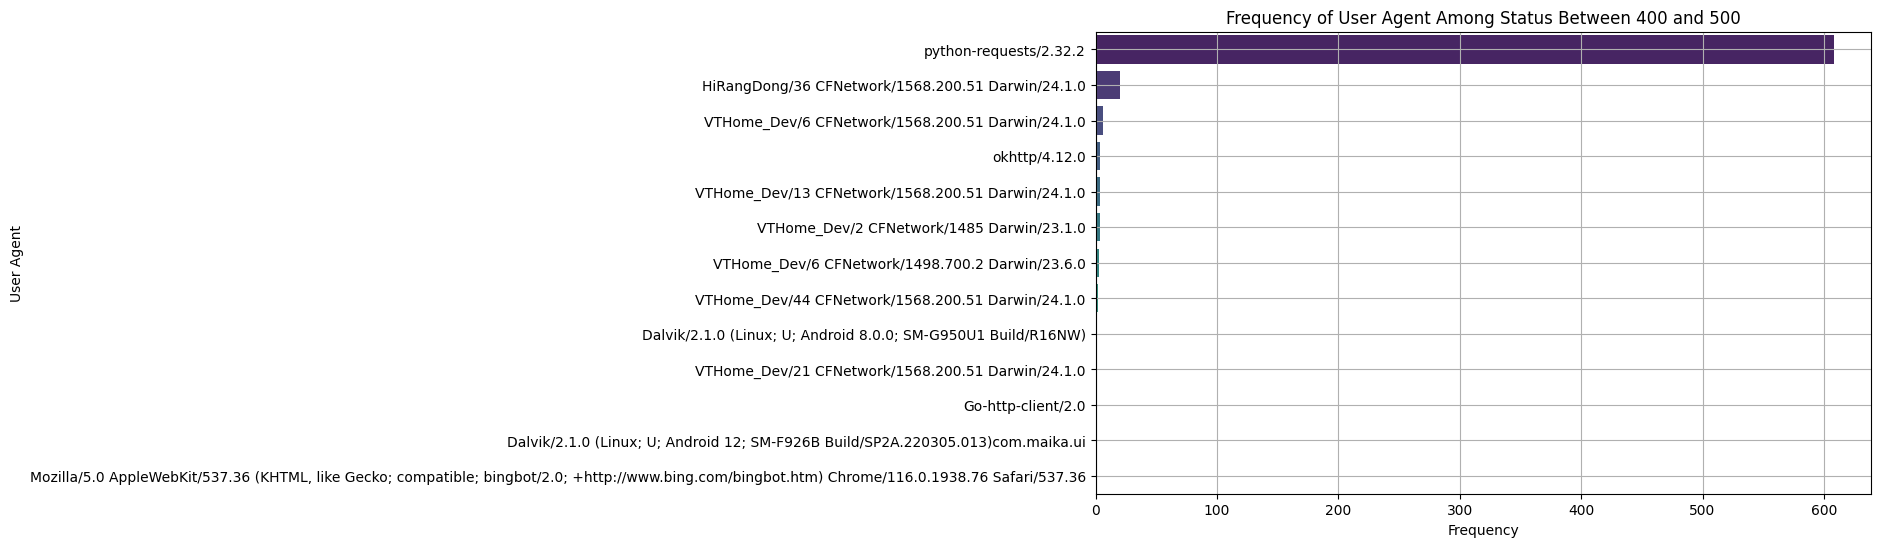

In [34]:
# Tạo biểu đồ tần suất cho user_agent 
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(y='user_agent', data=df_filter, order=df_filter['user_agent'].value_counts().index, palette='viridis') 
 # Thêm nhãn và tiêu đề 
plt.xlabel('Frequency')
plt.ylabel('User Agent') 
plt.title('Frequency of User Agent Among Status Between 400 and 500') 
plt.grid(True) 
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10988\3349079447.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='user_agent', data=df_filter, order=df_filter['user_agent'].value_counts().index, palette='viridis', ax=axs[1, 1])


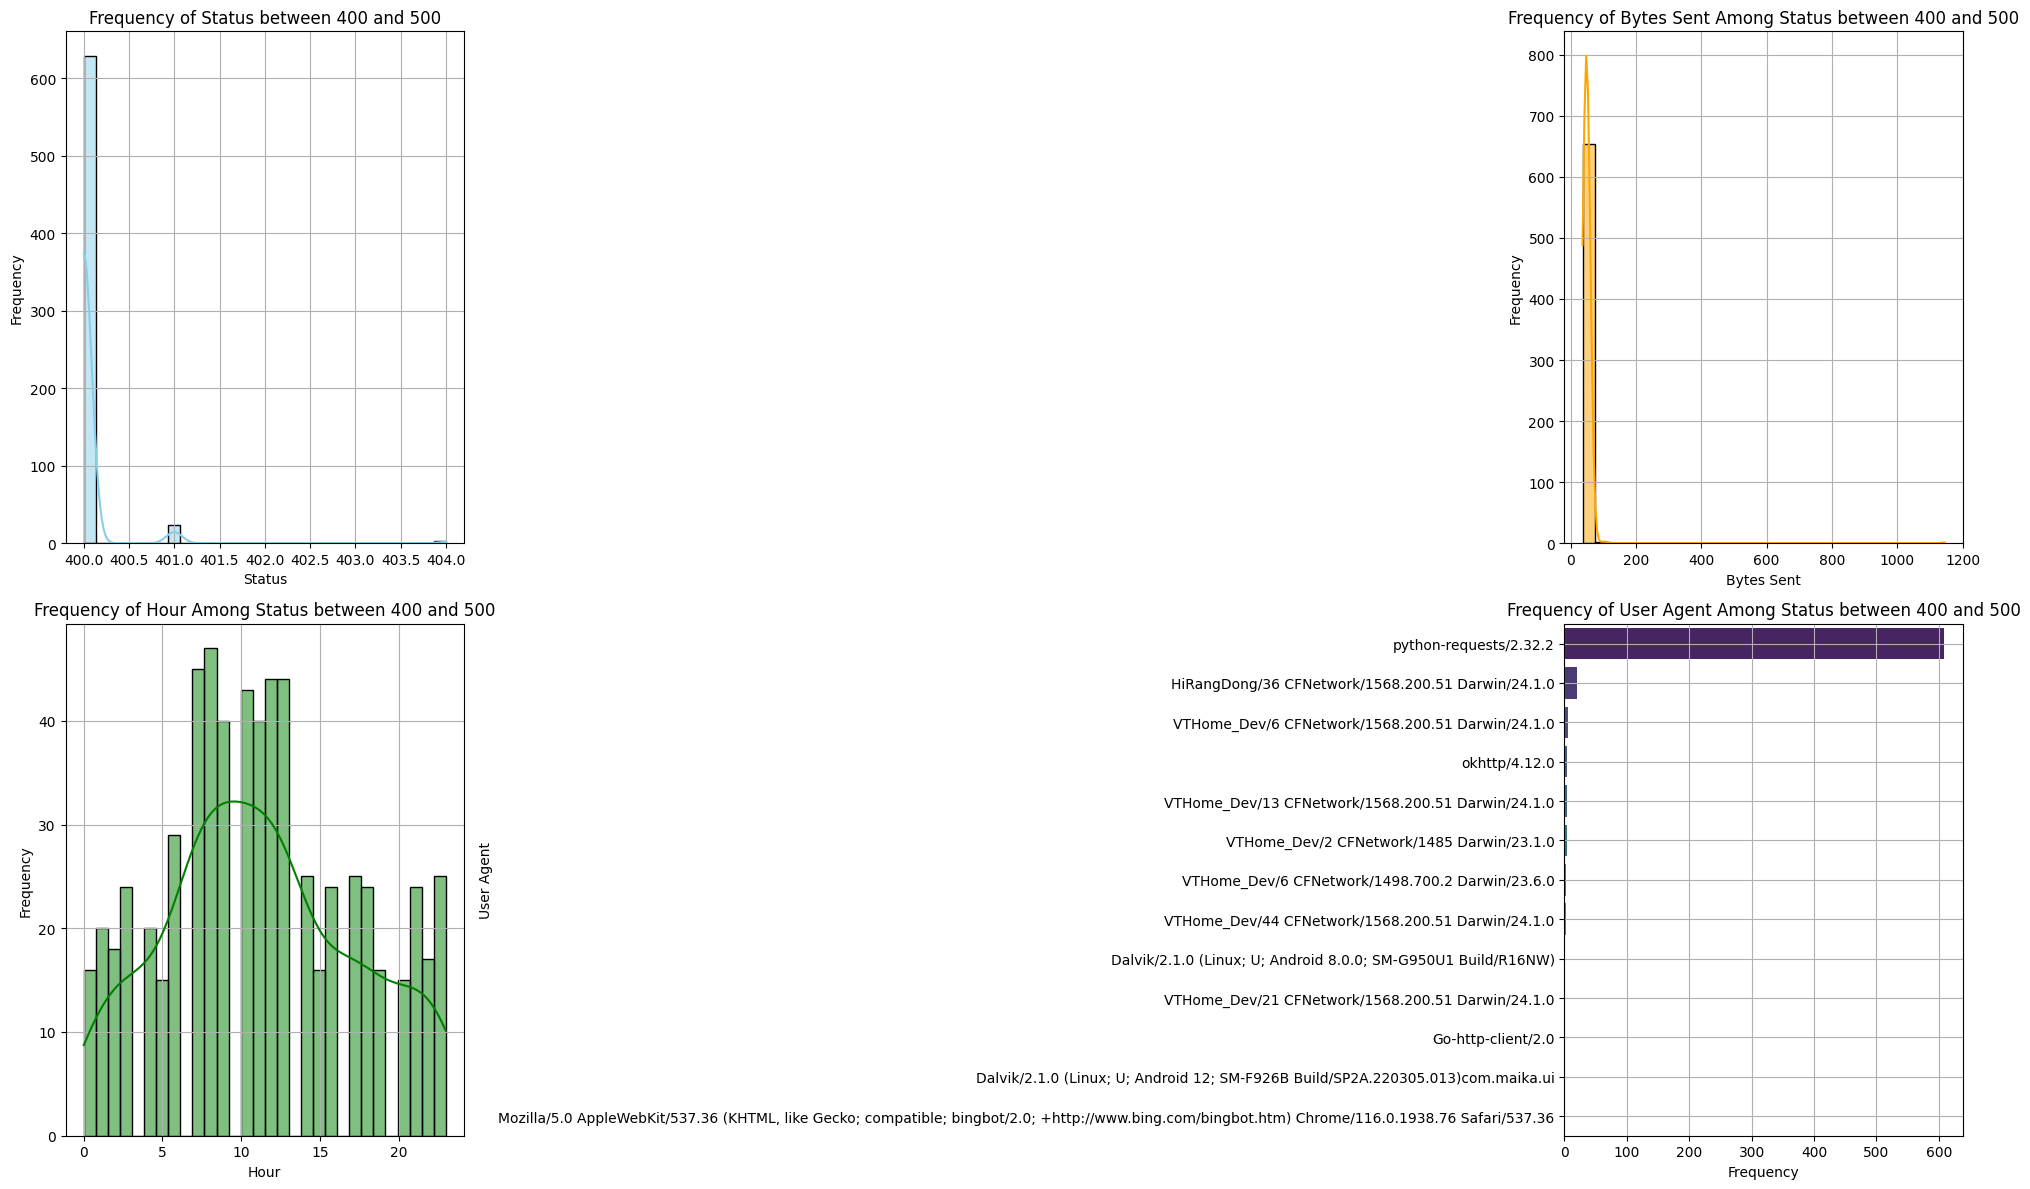

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
# Frequency of Status between 400 and 500 
sns.histplot(df_filter['status'], bins=30, kde=True, color='skyblue', ax=axs[0, 0]) 
axs[0, 0].set_xlabel('Status') 
axs[0, 0].set_ylabel('Frequency') 
axs[0, 0].set_title('Frequency of Status between 400 and 500') 
axs[0, 0].grid(True) 
# Frequency of Bytes Sent Among Status between 400 and 500 
sns.histplot(df_filter['bytes_sent'], bins=30, kde=True, color='orange', ax=axs[0, 1]) 
axs[0, 1].set_xlabel('Bytes Sent') 
axs[0, 1].set_ylabel('Frequency') 
axs[0, 1].set_title('Frequency of Bytes Sent Among Status between 400 and 500') 
axs[0, 1].grid(True) 
# Frequency of Hour Among Status between 400 and 500 
sns.histplot(df_filter['hour'], bins=30, kde=True, color='green', ax=axs[1, 0]) 
axs[1, 0].set_xlabel('Hour') 
axs[1, 0].set_ylabel('Frequency') 
axs[1, 0].set_title('Frequency of Hour Among Status between 400 and 500') 
axs[1, 0].grid(True) 
# Frequency of User Agent Among Status between 400 and 500 
sns.countplot(y='user_agent', data=df_filter, order=df_filter['user_agent'].value_counts().index, palette='viridis', ax=axs[1, 1])
axs[1, 1].set_xlabel('Frequency') 
axs[1, 1].set_ylabel('User Agent') 
axs[1, 1].set_title('Frequency of User Agent Among Status between 400 and 500') 
axs[1, 1].grid(True) # Điều chỉnh không gian giữa các biểu đồ 
plt.tight_layout() 
plt.show()


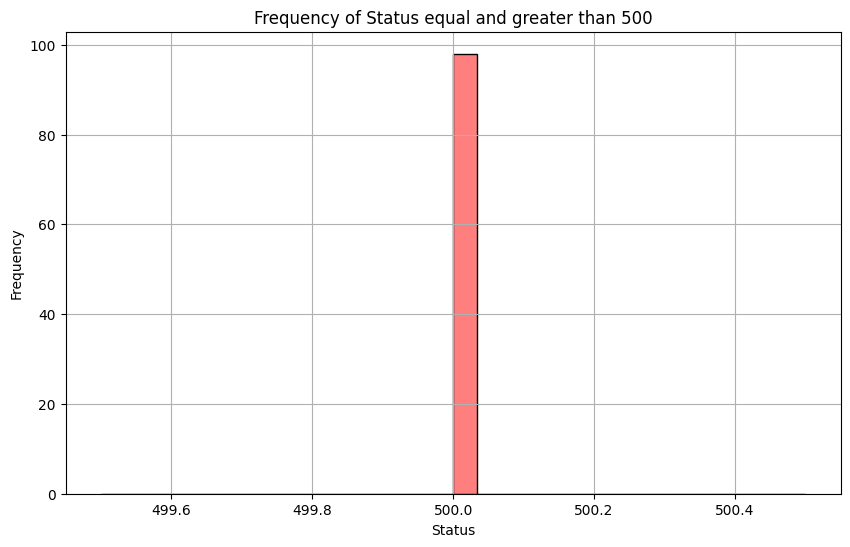

In [36]:
df_filter1 = df [df['status']>=500]
plt.figure(figsize=(10,6))
sns.histplot(df_filter1['status'], bins =30, kde = True,
              color = 'red')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Frequency of Status equal and greater than 500')
plt.grid()
plt.show()


In [37]:
df_filter1['status'].value_counts()

status
500    98
Name: count, dtype: int64

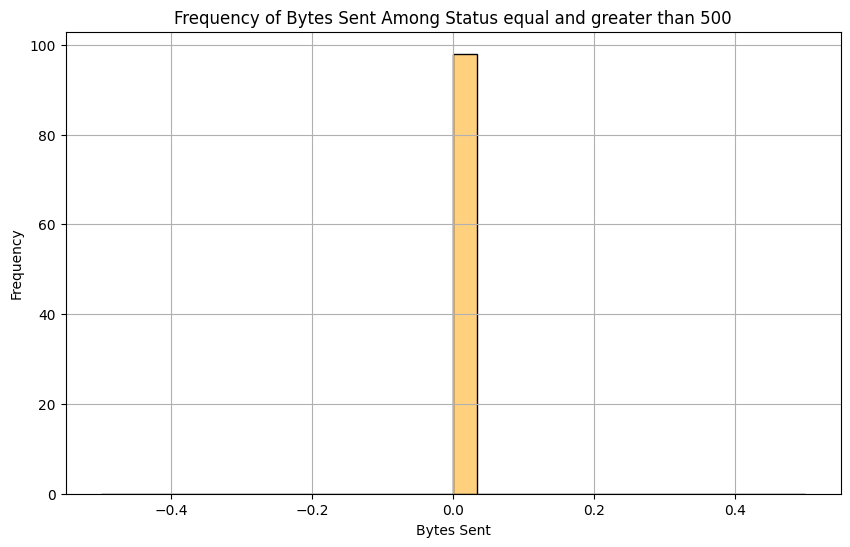

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df_filter1['bytes_sent'], bins =30, kde = True, 
             color = 'orange')
plt.xlabel('Bytes Sent')
plt.ylabel('Frequency')
plt.title('Frequency of Bytes Sent Among Status ' 
          'equal and greater than 500')
plt.grid()
plt.show()

In [39]:
df_filter1['bytes_sent'].value_counts()

bytes_sent
0    98
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


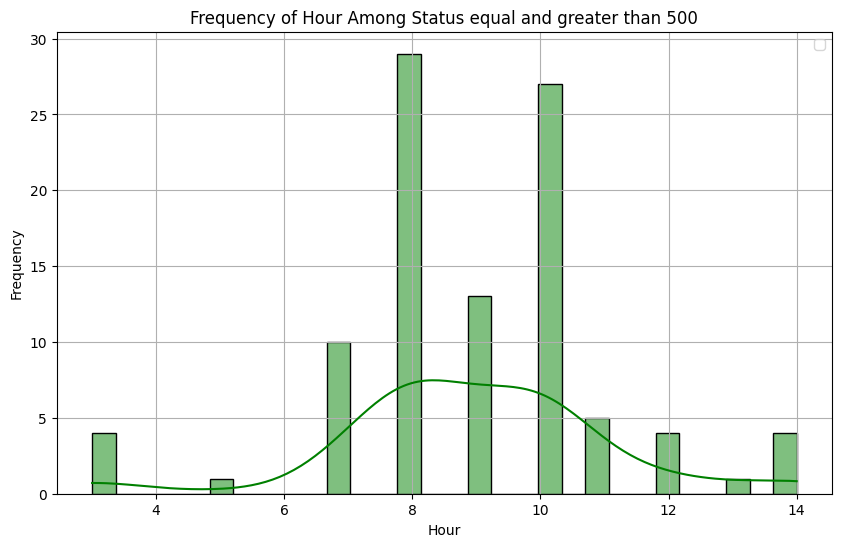

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df_filter1['hour'], bins =30, kde = True, 
             color = 'green')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency of Hour Among Status equal and greater than 500')
plt.grid()
plt.legend()
plt.show()

In [41]:
df_filter1['hour'].value_counts()

hour
8     29
10    27
9     13
7     10
11     5
12     4
14     4
3      4
5      1
13     1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_10988\2778299017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='user_agent', data=df_filter1,


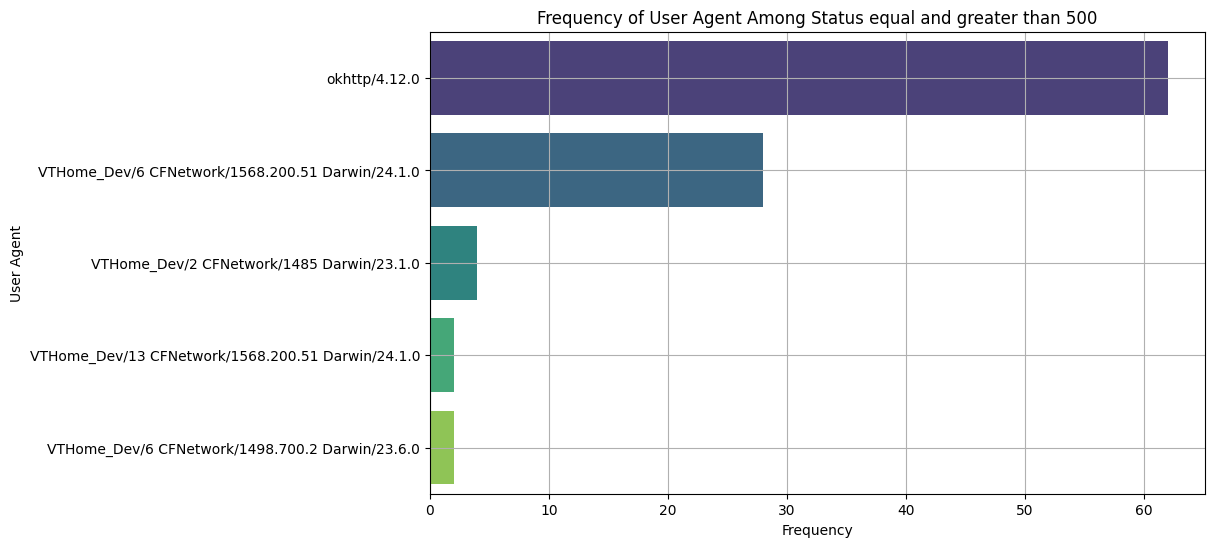

In [42]:
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(y='user_agent', data=df_filter1, 
                   order=df_filter1['user_agent'].value_counts().index, 
                   palette='viridis') 
plt.xlabel('Frequency')
plt.ylabel('User Agent') 
plt.title('Frequency of User Agent Among Status equal and greater than 500') 
plt.grid(True) 
plt.show()

In [43]:
df_filter1['user_agent'].value_counts()

user_agent
okhttp/4.12.0                                        62
VTHome_Dev/6 CFNetwork/1568.200.51 Darwin/24.1.0     28
VTHome_Dev/2 CFNetwork/1485 Darwin/23.1.0             4
VTHome_Dev/13 CFNetwork/1568.200.51 Darwin/24.1.0     2
VTHome_Dev/6 CFNetwork/1498.700.2 Darwin/23.6.0       2
Name: count, dtype: int64

In [44]:
df['status'].value_counts()

status
200    65657
400      629
500       98
401       24
404        3
Name: count, dtype: int64

In [ ]:
log_level = df['status'].values


array([200, 200, 200, ..., 200, 200, 200], dtype=int64)

In [56]:
log_level_df = pd.DataFrame(log_level, columns = ['log_level'])

In [57]:
log_level_df

,log_level
0,200
1,200
2,200
3,200
4,200
...,...
66406,200
66407,200
66408,200
66409,200


In [59]:
log_level_df ['log_level'] = log_level_df ['log_level'].replace ({200: 'INFO', 400: 'ERROR', 401: 'ERROR', 404: "ERROR", 500 : 'FATAL'})

In [61]:
df = pd.concat([df, log_level_df], axis = 1 )

In [62]:
df

,std,remote_address,datetime,method,path,status,bytes_sent,referer,user_agent,day,hour,month,log_level
0,0,127.0.0.1,2024-11-30 06:51:41+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11,INFO
1,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status,200,1165,-,kube-probe/1.27,30,6,11,INFO
2,1,10.244.3.1,2024-11-30 06:51:42+00:00,0,/status/ready,200,19,-,kube-probe/1.27,30,6,11,INFO
3,0,127.0.0.1,2024-11-30 06:51:44+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11,INFO
4,0,127.0.0.1,2024-11-30 06:51:47+00:00,0,/status,200,1164,-,kong-ingress-controller/3.3.1,30,6,11,INFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66406,0,127.0.0.1,2024-12-01 14:19:02+00:00,0,/status,200,1166,-,kong-ingress-controller/3.3.1,1,14,12,INFO
66407,0,10.244.2.197,2024-12-01 14:19:04+00:00,0,/metrics,200,192072,-,otelcol-contrib/0.89.0,1,14,12,INFO
66408,0,127.0.0.1,2024-12-01 14:19:05+00:00,0,/status,200,1166,-,kong-ingress-controller/3.3.1,1,14,12,INFO
66409,0,10.244.5.196,2024-12-01 14:19:07+00:00,0,/metrics,200,192072,-,otelcol-contrib/0.89.0,1,14,12,INFO


In [63]:
df['log_level'].value_counts()

log_level
INFO     65657
ERROR      656
FATAL       98
Name: count, dtype: int64